In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import gdal
import flir_image_extractor


In [24]:
path_exit_tool = '/usr/local/bin/exiftool'

In [25]:
fir = flir_image_extractor.FlirImageExtractor(exiftool_path=path_exit_tool)
path_image = '1.JPG'
os.path.isfile(path_image)

True

In [26]:
fir.process_image(path_image)


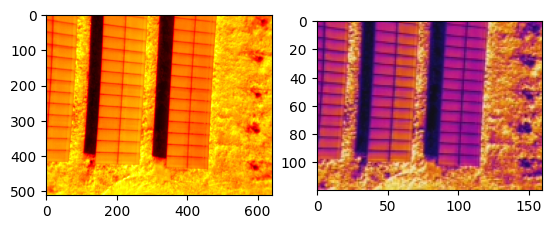

In [27]:
fir.plot()

In [28]:
a = fir.extract_thermal_image()

In [29]:
fir.export_thermal_to_csv('1_p.csv')

In [30]:
a.shape

(512, 640)

In [21]:
np.savetxt("foo.csv", a, delimiter=",")

In [27]:
data = pd.read_csv('1.csv')

In [29]:
data = np.array(data)

In [30]:
data.shape

(511, 640)

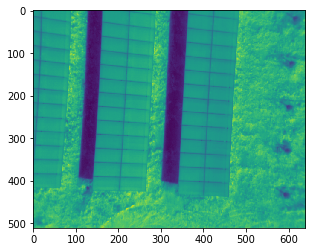

In [32]:
plt.imshow(data)

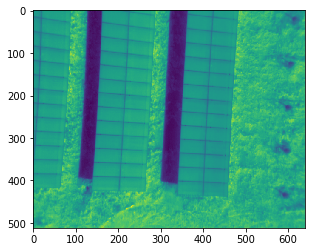

In [33]:
plt.imshow(a)

(array([2.16430e+04, 6.76600e+03, 2.02900e+03, 4.63400e+03, 2.63680e+04,
        1.41864e+05, 1.02517e+05, 2.11210e+04, 7.24000e+02, 1.40000e+01]),
 array([26.12380746, 29.38721494, 32.65062243, 35.91402992, 39.17743741,
        42.4408449 , 45.70425238, 48.96765987, 52.23106736, 55.49447485,
        58.75788234]),
 <a list of 10 Patch objects>)

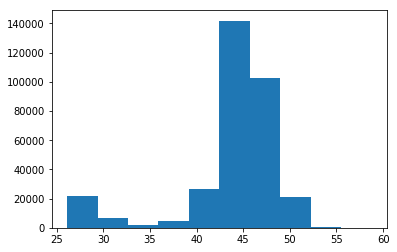

In [34]:
plt.hist(a.flatten())

(array([2.15900e+04, 6.74700e+03, 2.02500e+03, 4.62900e+03, 2.66300e+04,
        1.41176e+05, 1.02408e+05, 2.11080e+04, 7.13000e+02, 1.40000e+01]),
 array([26.082 , 29.3264, 32.5708, 35.8152, 39.0596, 42.304 , 45.5484,
        48.7928, 52.0372, 55.2816, 58.526 ]),
 <a list of 10 Patch objects>)

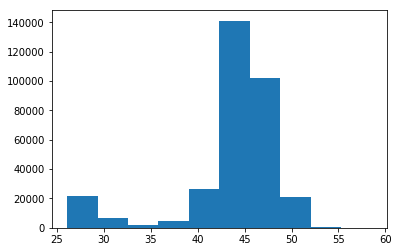

In [35]:
plt.hist(data.flatten())

In [36]:
b = a[1:,:]
b.shape

(511, 640)

In [37]:
error = data - b

(array([1.80000e+01, 1.39100e+03, 3.42520e+04, 1.27162e+05, 1.14185e+05,
        1.73080e+04, 2.78800e+03, 2.04600e+03, 8.11700e+03, 1.97730e+04]),
 array([-0.23188234, -0.21287485, -0.19386736, -0.17485987, -0.15585238,
        -0.1368449 , -0.11783741, -0.09882992, -0.07982243, -0.06081494,
        -0.04180746]),
 <a list of 10 Patch objects>)

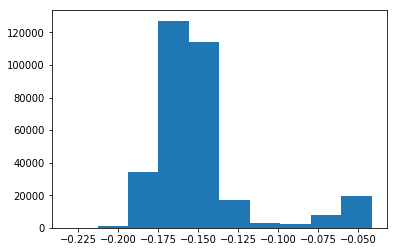

In [38]:
plt.hist(error.flatten())

In [43]:
path_tif = 'Ortho.tif'

In [44]:
ds = gdal.Open(path_tif)

In [46]:
ds.GetLayerCount()

0

In [47]:
d = ds.ReadAsArray()

In [50]:
d.shape

(4, 5237, 4335)

In [53]:
fir.save_images()